# Laboratorio 4


Juan Camilo Gallego
CC: 1000098978

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import plotly.graph_objects as go

## Pregunta 1

Para simular un conjunto de características $x_1$ , $x_2$,..., $x_n$ trabajaremos en la primera parte con dos características de datos aleatorios que presentan un plano y mostraremos que los párametros optimizados se corresponden con el valor esperado.

- Definir la ecuación  $y = 2.1*x_1 - 3.1*x_2$, y generar números aleatorios que pertenecen al plano. 

- Realizar un diagrama 3D de los puntos generados aleatoriamente. 


Nuestro objetivo será encontrar los valores $\theta_0 = 0, \theta_1=2.1, \theta_1=3.1$ que mejor ajustar el plano, empleando cálculos vectorizados. 

In [2]:
N=100
x1=np.linspace(-1, 1, N)
x2=np.linspace(-1, 1, N)

X_1,X_2 =np.meshgrid(x1, x2)
Y = 2.1*X_1 - 3.1*X_2

x_1= 2*np.random.random(N)-1
x_2= 2*np.random.random(N)-1

y_label = 2.1 * x_1 - 3.1 * x_2 

fig = go.Figure(go.Surface(x=X_1, y=X_2, z=Y))
fig.add_trace(go.Scatter3d(x=x_1, y=x_2, z=y_label, mode='markers', marker=dict(size=4, color='white')))
fig.show()

## Pregunta 2

Inicializar conjunto de parámetros $\Theta$ de manera aleatoria.

In [3]:
theta=np.random.random(3).reshape(3, 1)
theta.shape

(3, 1)

## Pregunta 3

Construir la matrix X con dimensiones $(n+1, m)$, m es el numero de datos de entrenamiento y (n) el número de caracteristicas.

In [4]:
unos=np.ones(N)
X=np.array([unos,x_1,x_2])
X.shape

(3, 100)

## Pregunta 4, 5, 6

4. Calcular la función de coste(revise cuidosamente las dimensiones de cada matriz):
 
  - $h = \Theta^{T} X $
  - $\Lambda= (h -Y) $
  - $\Lambda*= (h -Y)^2 $
  - $\Lambda= [\Lambda_1,\Lambda_2, ...,\Lambda_m]$
  - $J = \frac{1}{2m} \sum_{i}^m \Lambda_i $

5. Aplicar el gradiente descendente: 
  - Encontrar el gradiente.
    $\nabla J = \Lambda X.T$
  
  - Actualizar los nuevos parametros: 
    $\Theta_{n+1}=\Theta_{n}-\alpha\nabla J$


6. Iterar para encontrar los valores $\Theta$ que se ajustan el plano. 

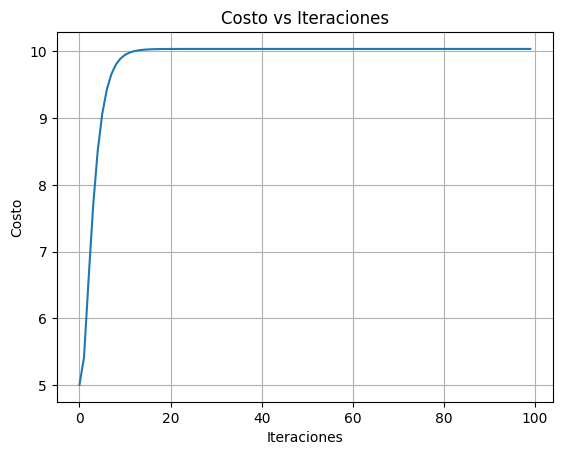

dimensiones de matriz de costo (100,)
valores de theta [[-4.35396446e-17]
 [ 2.10000000e+00]
 [-3.10000000e+00]]


In [5]:
def model(theta, X):
  return theta.T@X

def costo(h, Y):
  J= (h-Y)**2
  return J.mean()

def update_params(theta, h, Y, learning_rate):
  grad = np.dot((h-Y), X.T).T
  theta = theta - learning_rate*grad
  return theta

theta=np.random.random(3).reshape(3, 1)
learning_rate=0.01

J = np.zeros(N)

for i in range(0, N):
  h = model(theta, X)
  J[i] = costo(h, Y)
  theta = update_params(theta, h, y_label, learning_rate)

plt.plot(J)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Costo vs Iteraciones')
plt.grid()
plt.show()

print(f'dimensiones de matriz de costo {J.shape}')
print(f'valores de theta {theta}')

Se logra ver que los valores son justamente 0, 2.1, -3.1 que es lo que se buscaba

## Generalizacion con clases, del Lab_hint

In [13]:
class MultilinearRegresion():
  def __init__(self, X, Y):
    self.X = X
    self.Y = Y
    Nfeatures = X.shape[0]
    self.theta = np.random.random(Nfeatures).reshape(Nfeatures, 1)

  def model(self):
    return self.theta.T @ self.X

  def costo(self):
    h = self.model()
    J = (h - self.Y)**2
    return J.mean()

  def update_params(self, learning_rate):
    h = self.model()
    grad = np.dot((h - self.Y), self.X.T).T
    self.theta = self.theta - learning_rate * grad

  def fit(self, learning_rate):
    J = np.zeros(100)
    for i in range(0, 100):
      J[i] = self.costo()
      self.update_params(learning_rate)

lr=MultilinearRegresion(X,y_label)
lr.fit(0.01)
lr.theta

array([[-5.11503241e-17],
       [ 2.10000000e+00],
       [-3.10000000e+00]])